## Important installations


In [12]:
# %pip install qiskit
# %pip install numpy
# %pip install matplotlib
# %pip install pylatexenc

## Figure Debug

In [53]:
%matplotlib inline

## Important imports

In [54]:
import qiskit
import qiskit.primitives
import qiskit.visualization
import numpy as np
import matplotlib.pyplot as plt  # Import matplotlib for plotting

from qiskit import QuantumCircuit  # Import QuantumCircuit to create quantum circuits
from qiskit.quantum_info import Statevector  # Import Statevector for visualization
from qiskit.quantum_info import Pauli # Import Pauli for quantum state Manipulation representationfrom qiskit import QuantumCircuit # Import QuantumCircuit to create quantum circuits
from qiskit.visualization import plot_bloch_multivector # Import the function to visualize the Bloch sphere
from qiskit_aer.primitives import Estimator    # Import Estimator for quantum state estimation

## Operators 
* w/Explanation
* SingleQ_bit
* TwoQbit

In [55]:
# ##### Pauli operators for 1-qubit measurements #####
X = Pauli('X')    ## Bit flip operator (also known as NOT gate)
Y = Pauli('Y')    ## Bit flip operator and phase flip operator
Z = Pauli('Z')    ## Phase flip operator
I = Pauli('I')    ## Identity operator (does nothing)
observablesSingleQ_Bit = [X, Y, Z, I]  # List of Pauli operators for 1-qubit measurements
# ##### Pauli operators for 2-qubit measurements #####  
                                                                                         #####()####
ZZ = Pauli('ZZ')  ## Performs the Z operator on both qubits,                           // UU or DD \\
ZI = Pauli('ZI')  ## Performs the Z op on 1st q-bit and I on 2nd qubit,                  //  U0  \\ 
IZ = Pauli('IZ')  ## Performs the Z op on 2nd q-bit and I on 1st qubit,                  //  0U  \\
XX = Pauli('XX')  ## Performs the X operator on both qubits, are both alliged diagonal  //  DiDi  \\
XI = Pauli('XI')  ## Performs the X op on 1st q-bit and I on 2nd qubit,                  //  Di0  \\
IX = Pauli('IX')  ## Performs the X op on 2nd q-bit and I on 1st qubit,                  //  0Di  \\

observablesTwoQ_Bit = [ZZ, ZI, IZ, XX, XI, IX]

## Q-bit Types 
* SingleQbit_Identity_Applied
* SingleQbit_Hadamard_Gate_Applied
* ThreeQBit

In [56]:
# lets visiualize the initial state |0> vector

def Bloch_SingleQbit_Identity_Applied():
    """Create a quantum circuit with a single qubit in the |0> state."""
    qc = QuantumCircuit(1) # Create a quantum circuit with 1 qubit
    state = Statevector.from_instruction(qc)  # Initial state |0>
    fig = plot_bloch_multivector(state) # Plot the Bloch sphere for the initial state
    return fig  # Return the figure for visualization

# Visualize the state after applying Hadamard gate   
def Bloch_SingleQbit_Hadamard_Applied():
    """Create a quantum circuit with a single qubit in the |0> state and apply Hadamard gate."""
    qc_Single_H_Applied = QuantumCircuit(1)  # Create a quantum circuit with 1 qubit
    qc_Single_H_Applied.h(0)  # Apply Hadamard gate to put the qubit in superposition
    state = Statevector.from_instruction(qc_Single_H_Applied)  # Get the statevector of the circuit
    plot_bloch_multivector(state, title="Single qubit state |0> :: Hadamard gate Applied")  # Plot the Bloch sphere for the Hadamard state
    
# Visualize the state after applying Hadamard gate twice
def Bloch_SingleQbit_2_Hadamard_Applied():
    """Create a quantum circuit with a single qubit in the |0> state and apply Hadamard gate twice."""
    qc_Single_2H_Applied = QuantumCircuit(1)  # Create a quantum circuit with 1 qubit
    qc_Single_2H_Applied.h(0)  # Apply Hadamard gate to put the qubit in superposition
    qc_Single_2H_Applied.h(0)  # Apply Hadamard gate again to return to |0>
    state = Statevector.from_instruction(qc_Single_2H_Applied)  # Get the statevector of the circuit
    fig = plot_bloch_multivector(state, title="Single qubit state |0> :: Hadamard gate Applied Twice")  # Plot the Bloch sphere for the double Hadamard state
    return fig  # Return the figure for visualization

## Bloch-sphere visual 
*     Initial state : |0> 
*     Vector For    : Single-Qbit
*     Applied       : Identity
*     Frequency     : Once

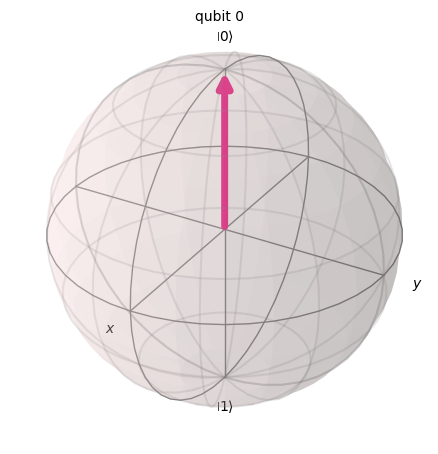

In [57]:
Bloch_SingleQbit_Identity_Applied();

## Notation Format:
*     Initial state : |0> 
*     Vector For    : Single-bit
*     Applied       : Identity
*     Frequency     : 1

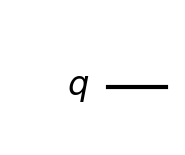

In [58]:
qc = QuantumCircuit(1)  # Create a quantum circuit with 1 qubit
qc.draw(output='mpl', scale=1.5, style={'name': 'bw'});

## Optional Reading
Estimator() is apart of Fire Opal Performance Management. It is 1 of 2, Q-Ctrl Sampler and Estimator. The Estiamator is a Performance Management function w/ Ai driven error suppression technique.

## Numerical Representation
*     stateVector Format :  [X, Y, Z, I]
*     Representation For : SingleQbit
*     Applied            : Identity
*     Frequency          : Once
* Run > See Values  : X, Y
* Remains 0         : X, Y
* Remains 1         : Z, I


*        :: Reason for why -0 in following:: 
*   b/c of floating-point math" etc. 
*   It is however represented on the graph}


In [59]:
# Create a 1-qubit circuit
qc1 = QuantumCircuit(1)

estimator1 = Estimator()

# Run the circuit with the observables
job = estimator1.run([qc1] * len(observablesSingleQ_Bit), observablesSingleQ_Bit)
result = job.result()
print(result.values)

[-0.046875    0.02734375  1.          1.        ]


## Graph Representation 
*     stateVector Format : [X, Y, Z, I]
*     Representation for : Single-Qbit
*     Applied            : Identity
*     Frequency          : Once
* Run > See Values Z & I
* States :  Z & I 
* Remains 1

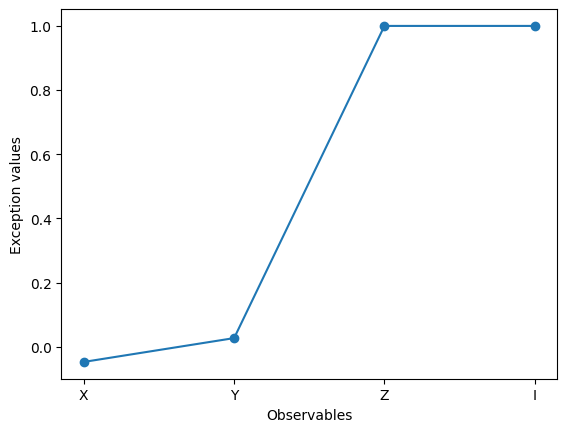

In [60]:
## The data, are the observables:: That are named
data = ['X', 'Y', 'Z', 'I']

## To obtain the values of each observable
values = job.result().values

## The plotting (x labels, y-values, markers for each step)
plt.plot(data, values, '-o')
plt.xlabel("Observables")
plt.ylabel("Exception values")
plt.show()

## Verifying Representations 
 Using stateVector Values 
*     Initial state : |0> 
*     Vector for    : Single-bit
*     Applied       : Identity 

*     Statevector   : ([1.+0.j, 0.+0.j])

Utilize        : Quantum IBM Constructor 
* Path To VERIFY : "Q-sphere -> press drop-down -> statevector

Statevector([1.+0.j, 0.+0.j],
            dims=(2,))


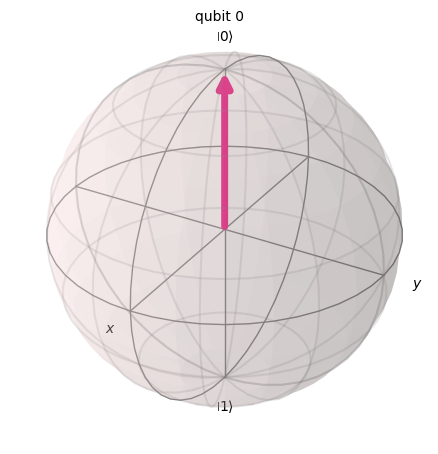

In [61]:
# get the statevcector
state = Statevector.from_instruction(qc1)
print(state)
plot_bloch_multivector(state);

## Bloch-sphere Visual 
*     Initial state : |0>
*     Vector for    : Single-Qbit
*     Applied       : Hadamard Gate  
*     Frequency     : Once

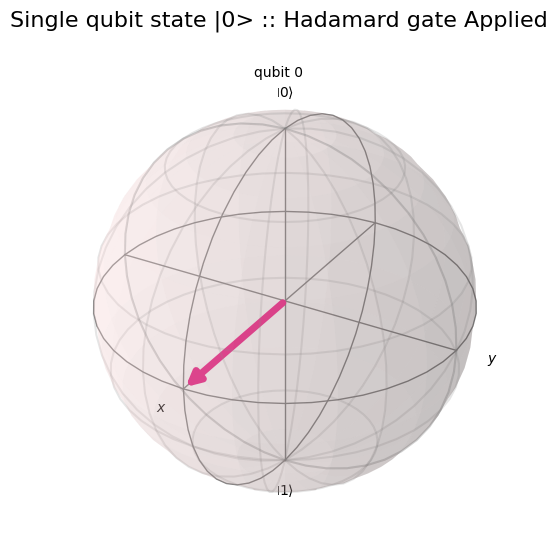

In [62]:
qc_Hadamard_Applied = Bloch_SingleQbit_Hadamard_Applied()

## Notation Format:
*     Initial state : |0> 
*     Vector For    : Single-bit
*     Applied       : Hadamard Gate
*     Frequency     : Once

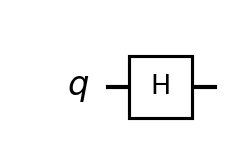

In [63]:
qc_Hadamard_Applied = QuantumCircuit(1)  # Create a quantum circuit with 1 qubit
qc_Hadamard_Applied.h(0)  # Apply Hadamard gate to put the qubit in superposition
qc_Hadamard_Applied.draw(output='mpl', scale=1.5, style={'name': 'bw'});

## Numerical Representation 
*     stateVector Format :  [X, Y, Z, I]
*     Representation For : Single-Qbit
*     Applied            : Hadamard Gate
*     Frequency          : Once
* Run > See Values   : Y, Z 
* Remains 0          : Y, Z
* Remains 1          : X, I 

In [64]:
# Create estimator instance
estimator1 = Estimator()

# Run the circuit with the observables
job = estimator1.run([qc_Hadamard_Applied] * len(observablesSingleQ_Bit), observablesSingleQ_Bit)
result = job.result()
print(result.values)

[1.         0.08398438 0.01757812 1.        ]


## Graph Representation 
*     stateVector Format : [X, Y, Z, I]
*     Representation For : Single-Qbit
*     Applied            : Hadamard gate
*     Frequency          : Once
* Run > See Values X & I
* Remains 1 : X, I
* Remains 0 : Y, Z

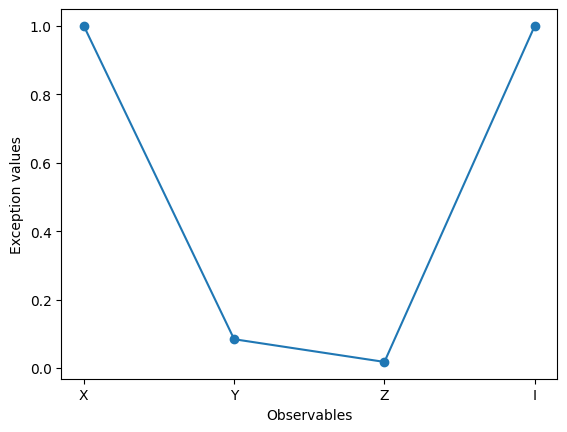

In [65]:
## The data, are the observables:: That are named
data = ['X', 'Y', 'Z', 'I']

## To obtain the values of each observable
values1 = job.result().values

## The plotting (x labels, y-values, markers for each step)
plt.plot(data, values1, '-o')
plt.xlabel("Observables")
plt.ylabel("Exception values")
plt.show()

## Verifying Representation  
*     Initial state : |0> 
*     Vector for    : Single-bit
*     Applied       : Hadamard Gate 

*     Statevector   : ([0.70710678+0.j, 0.70710678+0.j])

Utilize        : Quantum IBM Constructor 
* Path To VERIFY : "Q-sphere -> press drop-down -> statevector

Statevector([0.70710678+0.j, 0.70710678+0.j],
            dims=(2,))


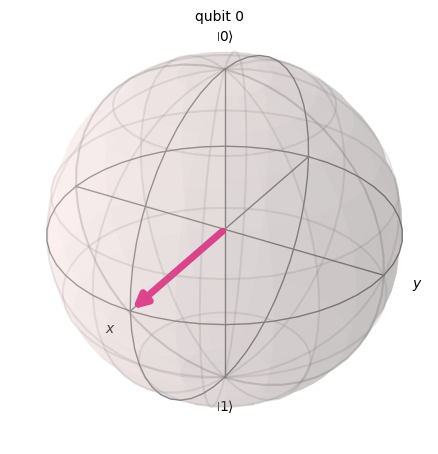

In [66]:
# Let's see the stateVector result
state = Statevector.from_instruction(qc_Hadamard_Applied)
print(state)
plot_bloch_multivector(state);

## Notation Format:
*     Initial state   : |0>
*     Vector For      : Single Q-bit
*     Applied         : Hadamard Gate
*     Frequency       : Twice

What Happens when two Hadamard gates are applied to one qubit?



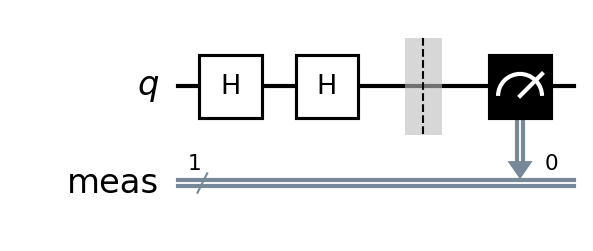

In [67]:
# Single-Qbit, Two Hadamard gates applied
qc = QuantumCircuit(1)
qc.h(0)
qc.h(0)

qc.measure_all()
qc.draw(output='mpl', scale=1.5, style={'name': 'bw'});

## Bloch-Sphere Visual
*     Initial state : |0>
*     Vector for    : Single-Qbit
*     Applied       : Hadamard Gate
*     Frequency     : Twice

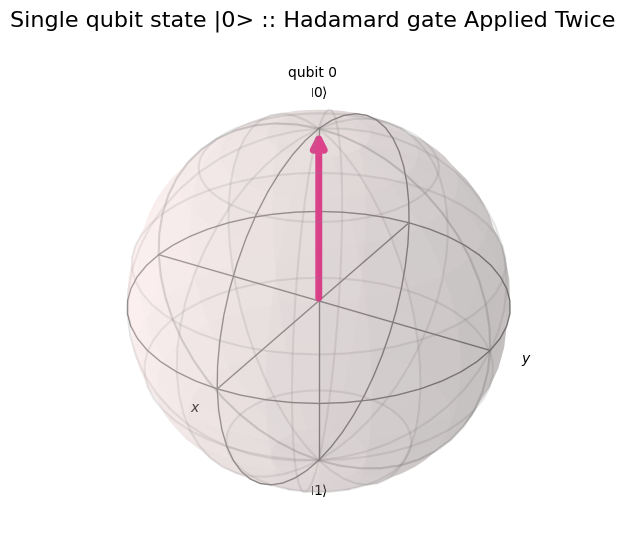

In [68]:
qc_Hadamard_Applied_Twice = Bloch_SingleQbit_2_Hadamard_Applied();

## Numerical Representation
*     stateVector Format :  [X, Y, Z, I]
*     Representation For : SingleQbit
*     Applied            : Hadamard Gate
*     Frequency          : Twice
* Run > See Values  : X, Y
* Remains 0         : X, Y
* Remains 1         : Z, I
*     Demonstrates       : Unitary Reversibility

In [69]:
# Create quantum circuit
qc_Hadamard_Applied_Twice = QuantumCircuit(1)  # Create a quantum circuit with 1 qubit
qc_Hadamard_Applied_Twice.h(0)  # Apply Hadamard gate to put the qubit in superposition
qc_Hadamard_Applied_Twice.h(0)  # Apply Hadamard gate again to return to |0>

# Create an estimator instance
estimator2 = Estimator()  
# Run the circuit with the observables
job = estimator1.run([qc_Hadamard_Applied_Twice] * len(observablesSingleQ_Bit), observablesSingleQ_Bit)
result = job.result()
print(result.values)

[0.06054688 0.04492188 1.         1.        ]


# Unitary Reversibility
* The Ability to undo a quantum gate's action by the use of it's inverse. 
* Reversibility is required, due to the laws of Quantum Mechanics.

## Simulate Detect for '00.f'
Flag position is in the back 00.'1'

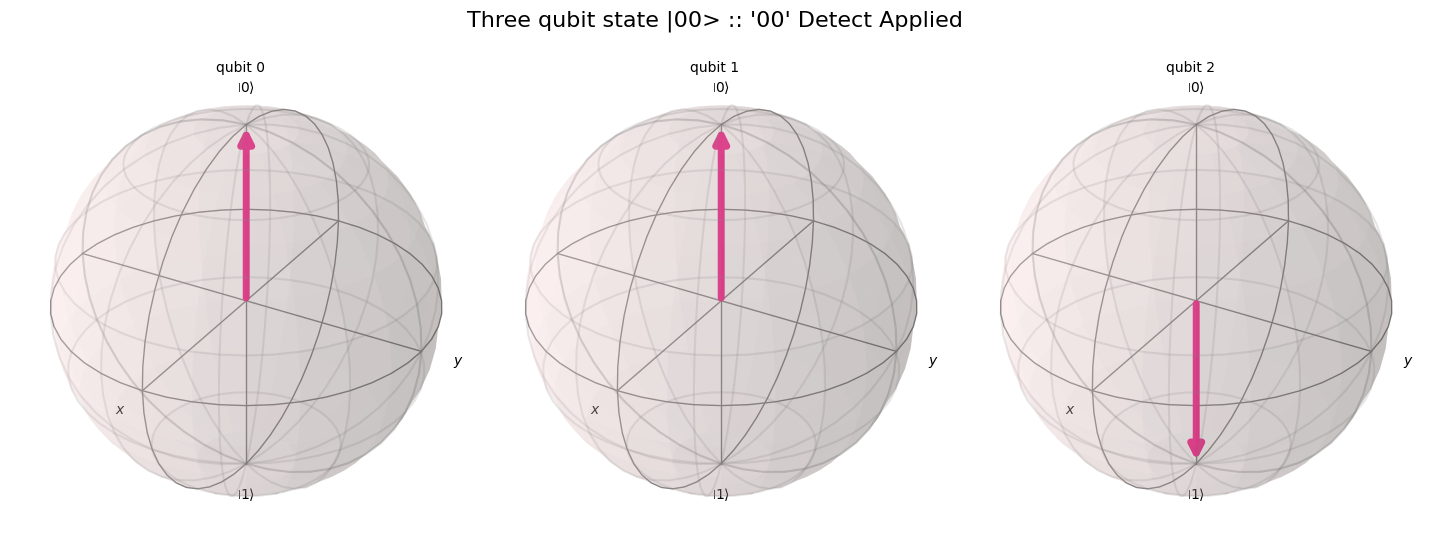

In [70]:
qc2 = QuantumCircuit(3,3)
qc2.x(0)  # Apply X gate to the first qubit
qc2.x(1)  # Apply X gate to the second qubit
qc2.cx(0, 2)  # Apply CNOT gate with control qubit 0 and target qubit 1
qc2.x(1) # Apply X gate to the second qubit
qc2.x(0)  # Apply X gate to the first qubit again

state = Statevector.from_instruction(qc2)
plot_bloch_multivector(state, title="Three qubit state |00> :: '00' Detect Applied");

## Notaion Format

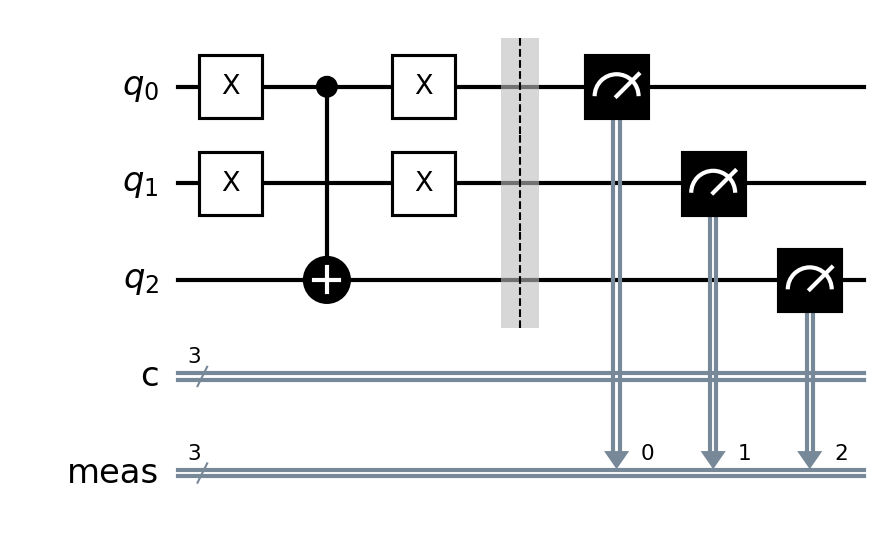

In [71]:
qc2 = QuantumCircuit(3,3)
qc2.x(0)  # Apply X gate to the first qubit
qc2.x(1)  # Apply X gate to the second qubit
qc2.cx(0, 2)  # Apply CNOT gate with control qubit 0 and target qubit 1
qc2.x(1) # Apply X gate to the second qubit
qc2.x(0)  # Apply X gate to the first qubit again
qc2.measure_all() # Measure the first two qubits into classical bits

qc2.draw(output='mpl', scale=1.5, style={'name': 'bw'});

## Verifying Representation  
*     Initial states : |0> 
*     Vectors for    : Three-Qbits
*     Oracle         : 2Qbit detector '00'
*     Applied        : Controlled Zero, Q0,Q1
*     Applied        : Contolled Not [Q0,Q2]
*     Flag           : Q2 

*     stateVectors   : [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,   1.+0.j,   0.+0.j, 0.+0.j,0.+0.j]

*    Sample                  : 00.f
*    Official Output         : 00.1

Statevector([0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j,
             0.+0.j],
            dims=(2, 2, 2))


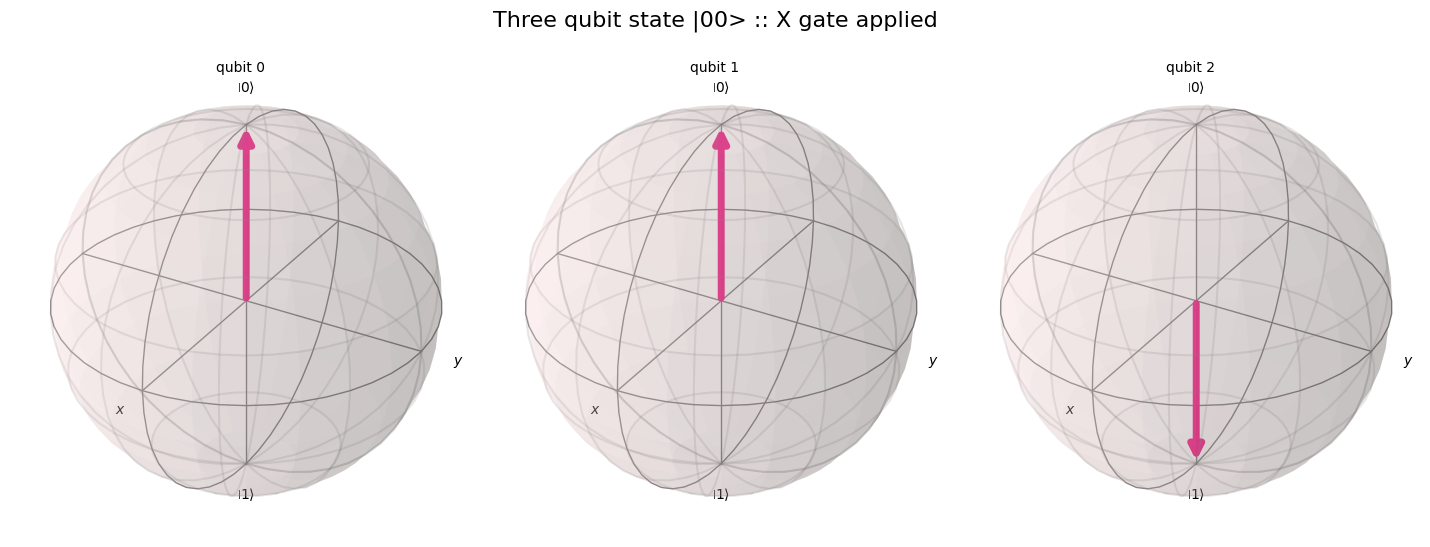

In [72]:
# Let's see the stateVector result
print(state)
plot_bloch_multivector(state, title="Three qubit state |00> :: X gate applied");

## Lets make a Controlled-Z 

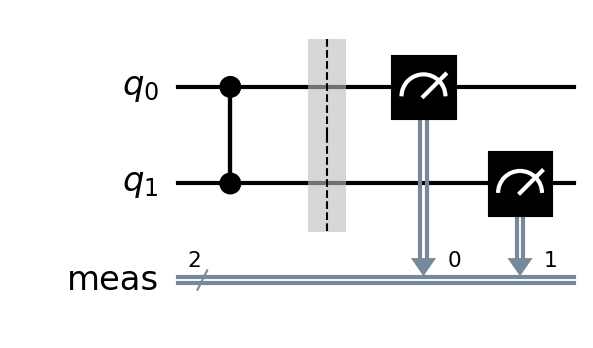

: 

In [ ]:
## create a controlled-Z gate circuit ::
qc = QuantumCircuit(2)  ## create a circuit with 2 qubits

qc.cz(0, 1)  # Apply Controlled-Z gate with control qubit 0 and target qubit 1
qc.measure_all()  # Measure both qubits
qc.draw(output='mpl', scale=1.5, style={'name': 'bw'});